In [23]:
import pandas as pd
import numpy as np

In [24]:
import matplotlib.pyplot as plt

In [25]:
df_fr=pd.read_csv("Arya_DataScientist_Assignment/training_set.csv")

In [26]:
df_fr=df_fr.drop(['Unnamed: 0'],axis=1)

In [27]:
df_fr.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [28]:
df_fr.columns[:-1],

(Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
        'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
        'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
        'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
        'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
        'X52', 'X53', 'X54', 'X55', 'X56', 'X57'],
       dtype='object'),)

In [30]:
import seaborn as sns

From the the below bar plot it can be seen that the data is slighlty unbalance 

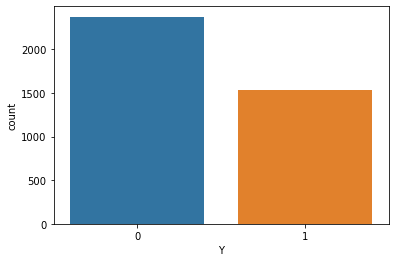

In [31]:
sns.countplot(df_fr['Y'])

In [32]:
corr=(df_fr.drop(['Y'],axis=1)).corr()

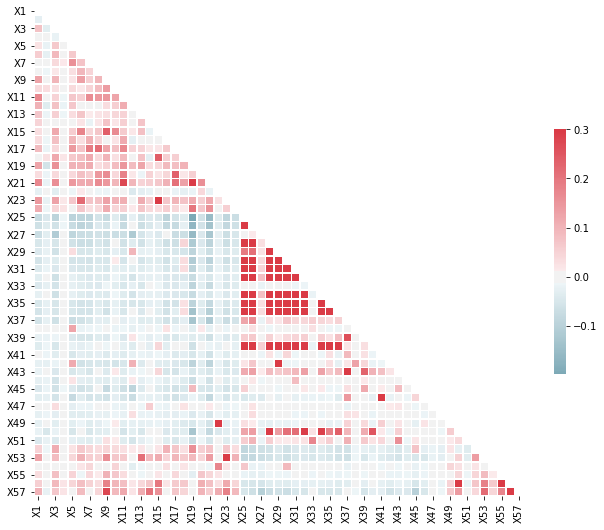

In [33]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the heatmap it was cleary absorved the there is high correlation between feature with bright red which include X27 and X32,X27 and X36 ,X31 and X40

In [34]:
comp=df_fr.copy()

In [42]:
def correlation(dataset, uthreshold,lthreshold):
    col_corr = set() # Set of all the names of deleted columns
    
    for i in range(len(corr.columns)):
        for j in range(i):
            if (corr.iloc[i, j] >= uthreshold) and corr.iloc[i, j] <= lthreshold and (corr.columns[j] not in col_corr):
                colname = corr.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [43]:
filter_col=correlation(comp,0.65,-0.65)

Not that we are not considering label for correlation in the below step we are removing the highly correlated feature we set +0.65  and -0.65 as threshold to remove the feature whose cofficient is in the given range. The high correlation among the features may cause the problem of multicollinearity.

Below are the feature after removal of high correlated features

In [44]:
len(filter_col.columns)

54

Since we have 54 features we it will very different two visulize so we are applying PCA to ease this task prior two apply standard scalar we are using standardization function 

In [45]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(filter_col.drop(['Y'],axis=1)) 

We are considering 2 component of PCA for this task 

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2'])


In [47]:
principalDf['Label']=filter_col['Y']

In [48]:
principalDf.head()

,PCA1,PCA2,Label
0,-0.707630,-0.389855,0
1,-1.697449,0.509577,1
2,-0.239174,-1.470631,0
3,-1.898843,0.594361,1
4,-1.810302,0.572086,1


In [49]:
import matplotlib.pyplot as plt

label = principalDf['Label']  # x values
pca1 = principalDf['PCA1']  # left y axis
pca2 = principalDf['PCA2']   # right y axis
#pca3 = principalDf['PCA3']

#plt.show()

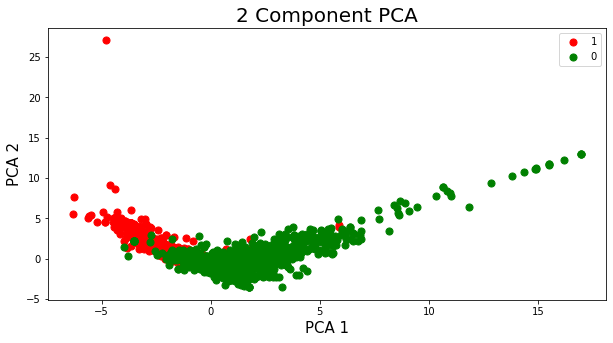

In [50]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PCA 1', fontsize = 15)
ax.set_ylabel('PCA 2', fontsize = 15)

ax.set_title('2 Component PCA', fontsize = 20)

targets = [1,0]

colors = ['r','g']

for target, color in zip(targets,colors):
    indicesToKeep = label == target
    ax.scatter(principalDf.loc[indicesToKeep, 'PCA1']
               , principalDf.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
plt.show()

Now we can see that the data that the data is linearly seprable from each other in 2D Plane

In [51]:
from pandas_profiling import ProfileReport

In [135]:
#profile = ProfileReport(df_fr, title="EDA Profiling Report")

In [52]:
#profile.to_notebook_iframe()

In [53]:
#profile.to_file("output.html")

In [54]:

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [55]:
Y=filter_col['Y']
X=filter_col.drop(['Y'],axis=1)

In [56]:
from sklearn.ensemble import ExtraTreesClassifier

Now for extratreeClassifier  we use to remove the unused features.By the concept of information gain

In [57]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

The result is the features along with there weights 

In [58]:
features_weight=model.feature_importances_

In the next step we set the thrsehold of 0.009 the feautes whose weight are greater than that are consided

In [59]:
dic_feacture={i:j for i,j in zip(filter_col.columns,features_weight) if j>0.009 }

After that we get 32 features 

In [60]:
len(dic_feacture)

34

We spit the data with 25% as testing set and renaming training set

In [62]:
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X[list(dic_feacture.keys())], Y,test_size=test_size)

As from the PCA Result we have seen that the data is some how linearly seprable so we start with Logistic regrssion

In [122]:
import xgboost as xgb

In [123]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [124]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [125]:
cv_results = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [126]:
import matplotlib.pyplot as plt

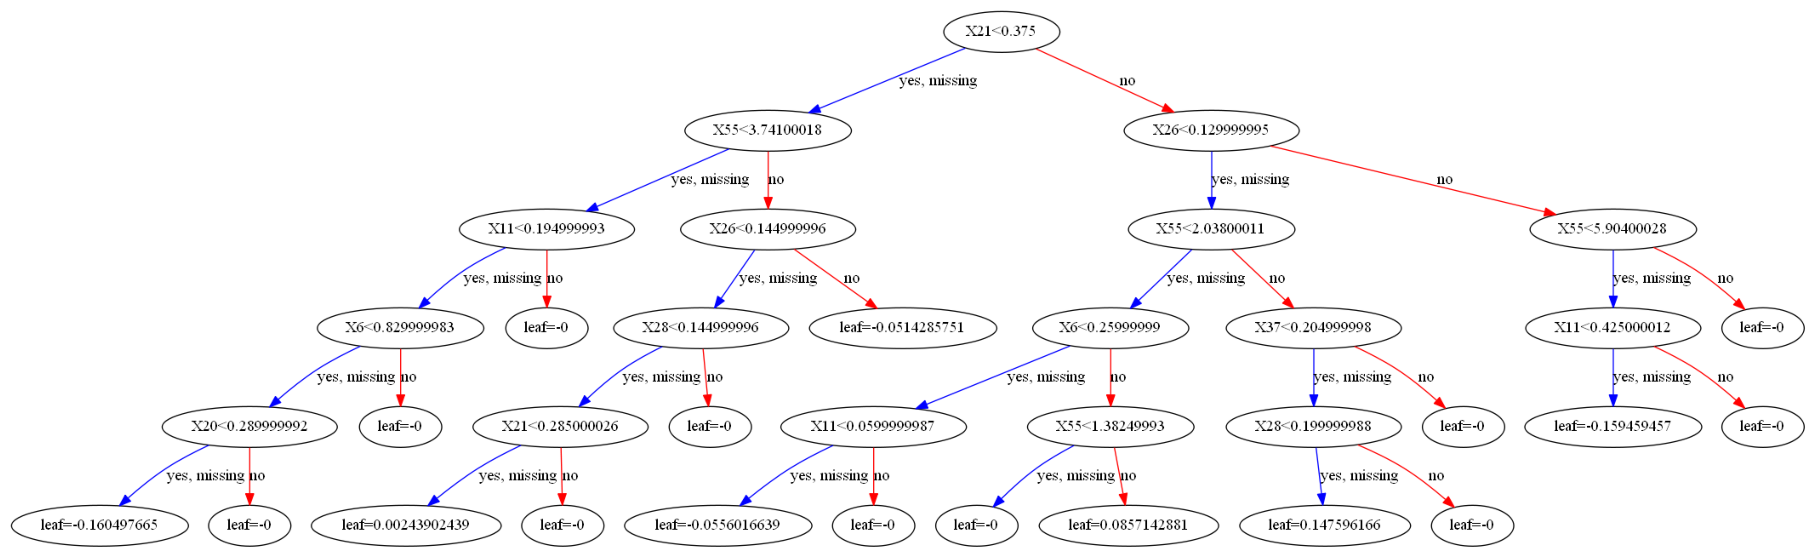

In [152]:
xgb.plot_tree(cv_results,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In the above diagram we tried DTee map in which how descion boundry are drawn can be visulized as we can see that how lower and higher value leads towards certain descion boundry.

In [64]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
#X, y = load_iris(return_X_y=True)
logestic_clf = LogisticRegression(random_state=0).fit(X_train, y_train)
logestic_predictions=logestic_clf.predict(X_test)

C:\Users\91914\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [65]:
logestic_clf.score(X_test,y_test)

0.9161554192229039

In [67]:
from sklearn.metrics import plot_confusion_matrix

In [72]:
class_names=[0,1]

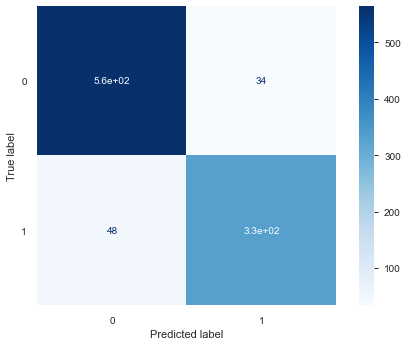

In [73]:
plot_confusion_matrix(logestic_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

In [75]:
from sklearn.metrics import f1_score

In [78]:
from sklearn import metrics

In [76]:
f1_score(y_test, logestic_predictions, average='macro')

0.9111559169565506

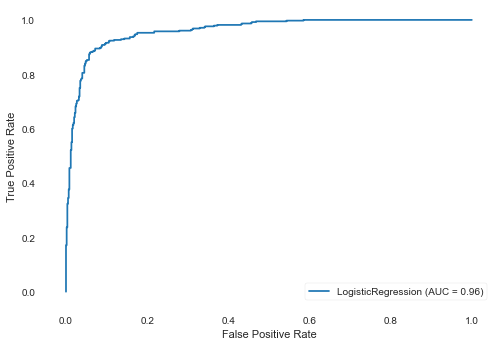

In [79]:
metrics.plot_roc_curve(logestic_clf, X_test, y_test)

The result from the logestic Regresion is give better result considering the simplicity of this algorithm for this problem and also the AUC area is also good with 0.96 which is highly acceptable in our case

In [164]:

tn, fp, fn, tp = confusion_matrix(y_test, logestic_predictions).ravel()
print("For Logestic Regression True Positive",tp,"False Positive",fp,'False Negative ',fn,' and True Negative',tn)
print("F1 Score of the Logestic Regression ",f1_score(y_test, logestic_predictions, average='macro'))
print("AUC For Logestic Regression ",metrics.roc_auc_score(y_test, logestic_predictions))

For Logestic Regression True Positive 332 False Positive 34 False Negative  48  and True Negative 564
F1 Score of the Logestic Regression  0.9111559169565506
AUC For Logestic Regression  0.908414011617673


Now in the next phase we wanted to check wether the model perform well we do a plane sepration 

In [80]:
from sklearn import svm

In [83]:
svcl = svm.SVC()

In [84]:
svcl.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [85]:
svc_pred=svcl.predict(X_test)

In [86]:
svcl.score(X_test,y_test)

0.6983640081799591

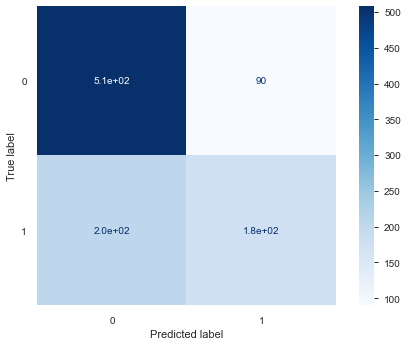

In [87]:
plot_confusion_matrix(svcl, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

The confusion matrix clearly say that the Supper Vector work great on 0 label and but throught false posite result 

In [88]:
f1_score(y_test, svc_pred, average='macro')

0.6588082947510333

Because of the high false positive result the F1 Score is also low 

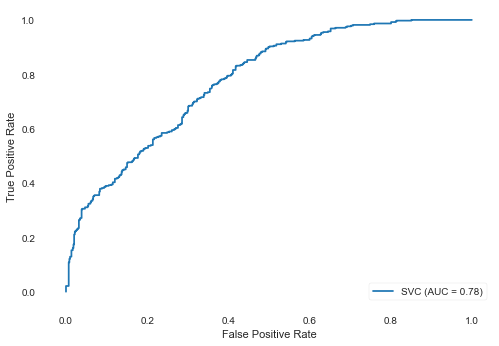

In [89]:
metrics.plot_roc_curve(svcl, X_test, y_test)

Similary the AUC with 0.78 curve also not  acceptable in our case

In [163]:

tn, fp, fn, tp = confusion_matrix(y_test, svc_pred).ravel()
print("For Support Vector True Positive",tp,"False Positive",fp,'False Negative ',fn,' and True Negative',tn)
print("F1 Score of the Support Vector ",f1_score(y_test, svc_pred, average='macro'))
print("AUC For Support Vector ",metrics.roc_auc_score(y_test, svc_pred))

For Support Vector True Positive 175 False Positive 90 False Negative  205  and True Negative 508
F1 Score of the Support Vector  0.6588082947510333
AUC For Support Vector  0.6550123217743354


In the next phase we will be trying Tree based classifier starting with XGBoast

In [90]:
xgboast_model = XGBClassifier()
xgboast_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
xgboast_pred = xgboast_model.predict(X_test)
xgboast_pred = [round(value) for value in xgboast_pred]

In [92]:

# evaluate predictions
accuracy = accuracy_score(y_test, xgboast_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 94.48%


In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
from sklearn.metrics import plot_confusion_matrix

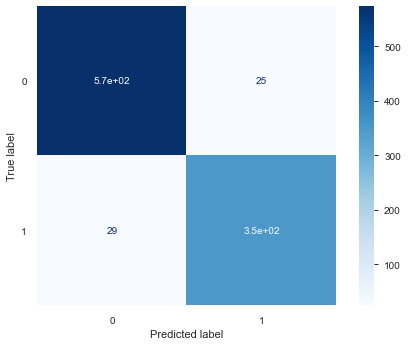

In [95]:
plot_confusion_matrix(xgboast_model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

The Confusion matrix from the XGBoast is signficantly imporoved from the past cases False Positive and True Negative is very low

In [141]:
test_fil_1=pd.read_csv('Arya_DataScientist_Assignment/test_set.csv')

In [142]:
test_fil=test_fil_1[list(dic_feacture.keys())]

In [147]:
test_fil_pred = xgboast_model.predict(test_fil)
test_fil_pred = [round(value) for value in test_fil_pred]

In [148]:
len(test_fil_pred)

691

In [149]:
test_fil_1['Class']=test_fil_pred

Result Output

In [150]:
test_fil_1.to_csv("Arya_DataScientist_Assignment/test_set_result.csv")

In [323]:
tn, fp, fn, tp = confusion_matrix(y_test, xgboast_pred).ravel()

In [96]:
from sklearn import metrics

In [97]:
f1_score(y_test, xgboast_pred, average='macro')

0.9417857142857142

The F1 Score also get improved with the 0.94

In [98]:
import matplotlib.pyplot as plt

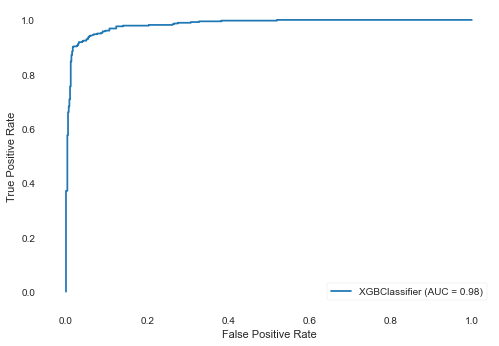

In [99]:
metrics.plot_roc_curve(xgboast_model, X_test, y_test)

In [162]:

tn, fp, fn, tp = confusion_matrix(y_test, xgboast_pred).ravel()
print("For XGBoost True Positive",tp,"False Positive",fp,'False Negative ',fn,' and True Negative',tn)
print("F1 Score of the XGBoost ",f1_score(y_test, xgboast_pred, average='macro'))
print("AUC For XGBoost ",metrics.roc_auc_score(y_test, xgboast_pred))

For XGBoost True Positive 351 False Positive 25 False Negative  29  and True Negative 573
F1 Score of the XGBoost  0.9417857142857142
AUC For XGBoost  0.9409390952297131


The AUC curve give 0.98 which is great result in our case 

Now in the next step we tried Gaussian Naive to see wether the data follow  gaussian distribution

In [100]:
from sklearn.naive_bayes import GaussianNB

In [101]:
gaussian_clf = GaussianNB()

In [102]:
gaussian_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [104]:
gaussian_pred=gaussian_clf.predict(X_test)

In [105]:
accuracy = accuracy_score(y_test, gaussian_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 88.14%


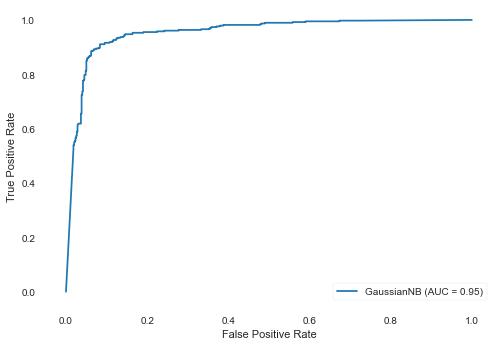

In [106]:
metrics.plot_roc_curve(gaussian_clf, X_test, y_test)

In [160]:

tn, fp, fn, tp = confusion_matrix(y_test, gaussian_pred).ravel()
print("For GaussianNB True Positive",tp,"False Positive",fp,'False Negative ',fn,' and True Negative',tn)
print("F1 Score of the Gassian NB ",f1_score(y_test, gaussian_pred, average='macro'))
print("AUC For GaussianNB ",metrics.roc_auc_score(y_test, gaussian_pred))

For GaussianNB True Positive 360 False Positive 96 False Negative  20  and True Negative 502
F1 Score of the Gassian NB  0.8788362952836637
AUC For GaussianNB  0.8934166519978877


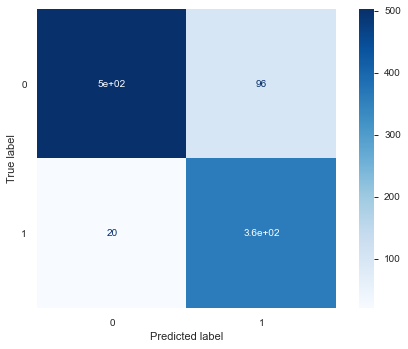

In [108]:
plot_confusion_matrix(gaussian_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

In [110]:
from sklearn.ensemble import RandomForestClassifier

In this phase we will be trying another tree based model which random forest since we try with depth 8

In [111]:
random_clf = RandomForestClassifier(max_depth=8, random_state=0)

In [112]:
random_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [114]:
random_clf_pred=random_clf.predict(X_test)

In [115]:
from sklearn import datasets, metrics, model_selection, svm

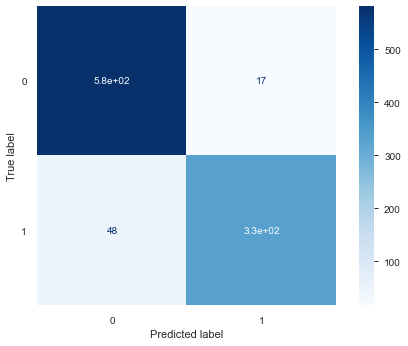

In [116]:
plot_confusion_matrix(random_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

In [117]:
f1_score(y_test, random_clf_pred, average='macro')

0.9289310137811451

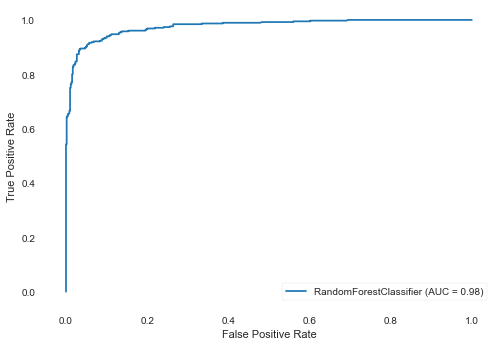

In [118]:
metrics.plot_roc_curve(random_clf, X_test, y_test) 

In [161]:

tn, fp, fn, tp = confusion_matrix(y_test, random_clf_pred).ravel()
print("For Random Forest True Positive",tp,"False Positive",fp,'False Negative ',fn,' and True Negative',tn)
print("F1 Score of the Random Forest ",f1_score(y_test, random_clf_pred, average='macro'))
print("AUC For Random Forest ",metrics.roc_auc_score(y_test, random_clf_pred))

For Random Forest True Positive 332 False Positive 17 False Negative  48  and True Negative 581
F1 Score of the Random Forest  0.9289310137811451
AUC For Random Forest  0.9226280584404154


To Conclude XGBoast give signifactly good result while Random forest is also performing good result but it was overfitter\g